## Metody Nieparametryczne w Statystyce
# Zadanie 5
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście istotności współczynnika korelacji w przypadku, gdy dane pochodzą z rozkładu normalnego o różnych parametrach. W trakcie symulowania danych należy pamiętać, by dane spełniały hipotezę główną. Porównać uzyskane wyniki dla wsp. korelacji Pearsona i Spearmana.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [1]:
import numpy as np, pandas as pd
from scipy.stats import pearsonr, spearmanr, norm
from tqdm import tqdm
import matplotlib.pyplot as plt

2. Badanie odsetków odrzuceń dla dwóch rozkładów normalnych o parametrach: mu z przedziału [-5, 5] i sigma ze zbioru {1, 3, 5, 8}.

Przed wykonaniem testu spodziewać się można, że odsetek odrzuceń będzie podobny dla wszystkich konfiguracji, dlatego, że w każdym przypadku rodzaj rozkładu jest taki sam oraz parametry dla obu próbek są identyczne.

pearson test


100%|██████████| 140/140 [01:03<00:00,  2.20it/s]


spearman test


100%|██████████| 140/140 [00:42<00:00,  3.31it/s]


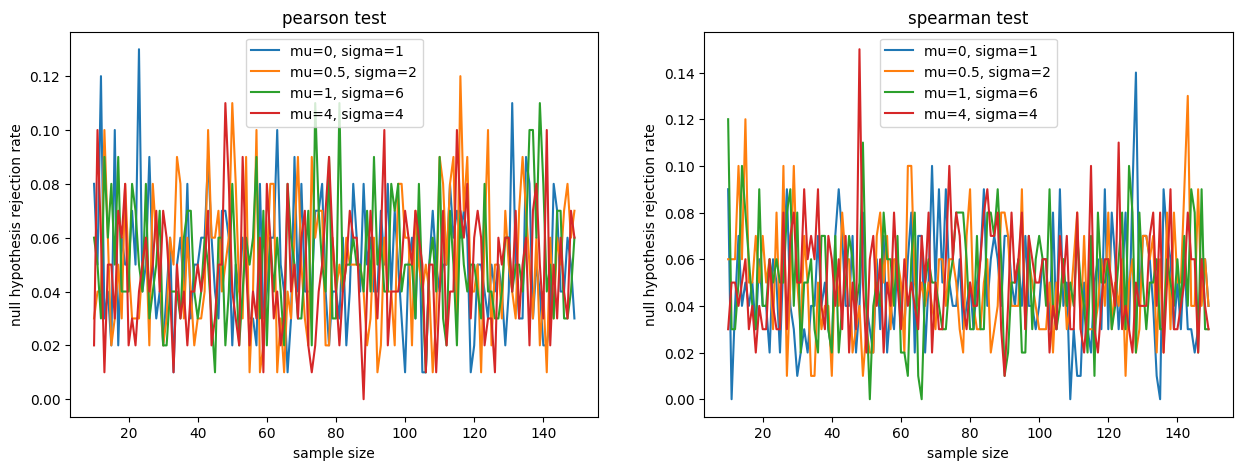

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for k in range(0, 2):    
    results = pd.DataFrame(columns=["mu=0, sigma=1", "mu=0.5, sigma=2", "mu=1, sigma=6", "mu=4, sigma=4"])
    buf = []
    print("pearson test" if k == 0 else "spearman test")
    for n in tqdm(range (10, 150)):
        for i in range (0, 100):
            for params in [(0, 1), (0.5, 2), (1, 6), (4, 4)]:
                #generowanie dwóch wektorów liczbowych z rozkładu normalnego
                x1 = norm.rvs(size=n, loc=params[0], scale=params[1])
                x2 = norm.rvs(size=n, loc=params[0], scale=params[1])
                
                #testy na istotność współczynnika korelacji
                if k == 0:
                    buf.append(pearsonr(x1, x2)[1] < 0.05)
                else:
                    buf.append(spearmanr(x1, x2)[1] < 0.05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(title="pearson test" if k == 0 else "spearman test", ax = axes[k],
                xlabel="sample size", ylabel="null hypothesis rejection rate")

Dla obu testów wyniki oscylują w okolicy poziomu istotności testu, co świadczy o tym, że oba testy są skuteczne w rozpoznawaniu korelacji między danymi z różnych rozkładów normalnych.